In [1]:
import nltk
from nltk.tree import Tree
from nltk.tokenize import word_tokenize
from IPython.display import display

### EXERCISE-1  In this part, you will be updating the grammar and the parser you built in the previous lab.

In [2]:
Grammar_1 = nltk.CFG.fromstring("""
S -> NP VP | NP VP 
NP -> N | Det N | PRO | N N 
VP -> V NP CP | VP ADVP | V NP 
ADVP -> ADV ADV 
CP -> COMP S 
N -> 'Lisa' | 'brother' | 'peanut' | 'butter'    
V -> 'told' | 'liked'  
COMP -> 'that' 
Det -> 'her' 
PRO -> 'she' 
ADV -> 'very' | 'much'

S -> NP VP 
NP -> NP CONJ NP | N | NP PP | Det N | N | Det N 
VP -> VP PP | VP CONJ VP | V | V 
PP -> P NP | P NP 
N -> 'Homer' | 'friends' | 'work' | 'bar'   
V -> 'drank' | 'sang'  
CONJ -> 'and' | 'and'
Det -> 'his' | 'the'
P -> 'from' | 'in'

S -> NP VP 
NP -> NP CONJ NP | N | N 
VP -> V ADJP 
ADJP -> ADJP CONJ ADJP | ADJ | ADV ADJ 
N -> 'Homer' | 'Marge'  
V -> 'are'   
CONJ -> 'and' | 'but'
ADJ -> 'poor' | 'happy'
ADV -> 'very'

S -> NP VP | NP AUX VP 
NP -> PRO | NP CP | Det N | PRO | PRO | PRO | N |Det N
VP -> V NP PP | V NP NP
CP -> COMP S
PP -> P NP 
Det -> 'the' | 'his' 
PRO -> 'he' | 'I' | 'him' 
N -> 'book' | 't' | 'sister'  
V -> 'gave' | 'given'  
COMP -> 'that'
AUX -> 'had' 
P -> 'to'

S -> NP VP
NP -> PRO | Det N | Det N
VP -> V NP PP
PP -> P NP 
Det -> 'the' | 'his'
PRO -> 'he' 
N -> 'book' | 'sister' 
V -> 'gave' 
P -> 'to'

S -> NP VP
NP -> Det ADJ N | Det ADJ ADJ N | N
VP -> V NP|VP PP
PP -> P NP 
Det -> 'the' | 'the'
ADJ -> 'big' | 'tiny' | 'nerdy'
N -> 'bully' | 'kid' | 'school'
V -> 'punched'
P -> 'after'
""")

### 1. Examine the parser output from the previous lab. Is any of the sentences ambiguous, that is, has more than one parse tree? Pick an example and provide an explanation. 

In [3]:
groucho_grammar6 = nltk.CFG.fromstring("""
S -> NP VP | NP VP 
NP -> N | Det N | PRO | N N 
VP -> V NP CP | VP ADVP | V NP 
ADVP -> ADV ADV 
CP -> COMP S 
N -> 'Lisa' | 'brother' | 'peanut' | 'butter'    
V -> 'told' | 'liked'  
COMP -> 'that' 
Det -> 'her' 
PRO -> 'she' 
ADV -> 'very' | 'much'
""")

In [4]:
sent6 = word_tokenize("Lisa told her brother that she liked peanut butter very much")
parser = nltk.ChartParser(groucho_grammar6)
for i in parser.parse(sent6):
    print(i)

(S
  (NP (N Lisa))
  (VP
    (VP
      (V told)
      (NP (Det her) (N brother))
      (CP
        (COMP that)
        (S (NP (PRO she)) (VP (V liked) (NP (N peanut) (N butter))))))
    (ADVP (ADV very) (ADV much))))
(S
  (NP (N Lisa))
  (VP
    (V told)
    (NP (Det her) (N brother))
    (CP
      (COMP that)
      (S
        (NP (PRO she))
        (VP
          (VP (V liked) (NP (N peanut) (N butter)))
          (ADVP (ADV very) (ADV much)))))))


In [5]:
np6 =nltk.Tree.fromstring('(S(NP (N Lisa))(VP(V told)(NP (Det her) (N brother))(CP(COMP that)(S(NP (PRO she))(VP(VP (V liked) (NP (N peanut) (N butter)))(ADVP (ADV very) (ADV much)))))))')
np6.pretty_print()

np6 =nltk.Tree.fromstring('(S(NP (N Lisa))(VP(VP(V told)(NP (Det her) (N brother))(CP(COMP that)(S (NP (PRO she)) (VP (V liked) (NP (N peanut) (N butter))))))(ADVP (ADV very) (ADV much))))')
np6.pretty_print()

      S                                                                  
  ____|____                                                               
 |         VP                                                            
 |     ____|____________________                                          
 |    |        |                CP                                       
 |    |        |            ____|__________                               
 |    |        |           |               S                             
 |    |        |           |     __________|__________                    
 |    |        |           |    |                     VP                 
 |    |        |           |    |           __________|__________         
 |    |        |           |    |          VP                    |       
 |    |        |           |    |     _____|_____                |        
 NP   |        NP          |    NP   |           NP             ADVP     
 |    |     ___|_____      |    

### 2. Have your parser parse this new sentence. It is covered by the grammar, therefore the  parser should be able to handle it: 
(s12): Lisa and her friends told Marge that Homer punched the bully in the bar

In [6]:
sen = word_tokenize("Lisa told her brother that she liked peanut butter very much")
parser = nltk.ChartParser(Grammar_1)
for i in parser.parse(sen):
    print(i)
    print("***********************************")

(S
  (NP (N Lisa))
  (VP
    (V told)
    (NP (Det her) (N brother))
    (CP
      (COMP that)
      (S
        (NP (PRO she))
        (VP
          (VP (V liked) (NP (N peanut) (N butter)))
          (ADVP (ADV very) (ADV much)))))))
***********************************
(S
  (NP (N Lisa))
  (VP
    (V told)
    (NP (Det her) (N brother))
    (CP
      (COMP that)
      (S
        (NP (PRO she))
        (VP
          (VP (V liked) (NP (N peanut)) (NP (N butter)))
          (ADVP (ADV very) (ADV much)))))))
***********************************
(S
  (NP (N Lisa))
  (VP
    (V told)
    (NP
      (NP (Det her) (N brother))
      (CP
        (COMP that)
        (S
          (NP (PRO she))
          (VP
            (VP (V liked) (NP (N peanut) (N butter)))
            (ADVP (ADV very) (ADV much))))))))
***********************************
(S
  (NP (N Lisa))
  (VP
    (V told)
    (NP
      (NP (Det her) (N brother))
      (CP
        (COMP that)
        (S
          (NP (PRO she))
          (V

### 3. Come up with a sentence of your own that's covered by grammar1 and have the parser parse it. Are you satisfied with the result?

In [7]:
test = word_tokenize("Homer and Lisa punched the tiny nerdy kid after school")
parser = nltk.ChartParser(Grammar_1)
for i in parser.parse(test):
    print(i)

(S
  (NP (NP (N Homer)) (CONJ and) (NP (N Lisa)))
  (VP
    (VP (V punched) (NP (Det the) (ADJ tiny) (ADJ nerdy) (N kid)))
    (PP (P after) (NP (N school)))))
(S
  (NP (NP (N Homer)) (CONJ and) (NP (N Lisa)))
  (VP
    (V punched)
    (NP (Det the) (ADJ tiny) (ADJ nerdy) (N kid))
    (PP (P after) (NP (N school)))))
(S
  (NP (NP (N Homer)) (CONJ and) (NP (N Lisa)))
  (VP
    (V punched)
    (NP
      (NP (Det the) (ADJ tiny) (ADJ nerdy) (N kid))
      (PP (P after) (NP (N school))))))


### 4. Let's revisit our first three sentences from the previous lab. 
(s1): Marge will make a ham sandwich 

(s2): will Marge make a ham sandwich 

(s3): Homer ate the donut on the table

#### As it is, your grammar1 does not cover them. But we can extend it with the CF rules from the three sentences' trees. Follow the steps below.

#### a. From the three sentence trees, create a list of all production rules in them. Turn it  into a set, which removes all duplicates. (Hint: use set().)

In [8]:
alt = set()

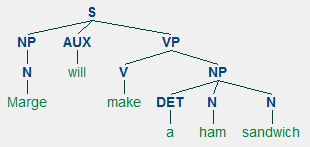

In [9]:
s1 = nltk.Tree.fromstring('(S(NP (N Marge))(AUX will)(VP (V make) (NP (Det a) (N ham) (N sandwich))))')
s1.pretty_print()

            S                       
   _________|________                
  |    |             VP             
  |    |     ________|___            
  NP   |    |            NP         
  |    |    |     _______|_____      
  N   AUX   V   Det      N     N    
  |    |    |    |       |     |     
Marge will make  a      ham sandwich



In [10]:
s1_rule=s1.productions()
for i in s1_rule:
    alt.add(i)
s1_rule    

[S -> NP AUX VP,
 NP -> N,
 N -> 'Marge',
 AUX -> 'will',
 VP -> V NP,
 V -> 'make',
 NP -> Det N N,
 Det -> 'a',
 N -> 'ham',
 N -> 'sandwich']

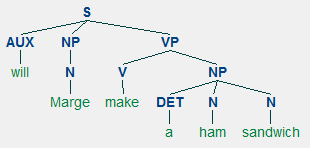

In [11]:
s2 = nltk.Tree.fromstring('(S(AUX will)(NP (N Marge))(VP (V make) (NP (Det a) (N ham) (N sandwich))))')
s2.pretty_print()

            S                       
  __________|________                
 |     |             VP             
 |     |     ________|___            
 |     NP   |            NP         
 |     |    |     _______|_____      
AUX    N    V   Det      N     N    
 |     |    |    |       |     |     
will Marge make  a      ham sandwich



In [12]:
s2_rule=s2.productions()
for i in s2_rule:
    alt.add(i)    
s2_rule    

[S -> AUX NP VP,
 AUX -> 'will',
 NP -> N,
 N -> 'Marge',
 VP -> V NP,
 V -> 'make',
 NP -> Det N N,
 Det -> 'a',
 N -> 'ham',
 N -> 'sandwich']

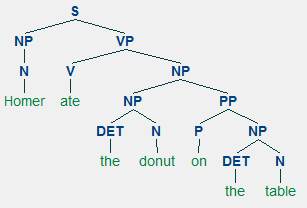

In [13]:
s3 = nltk.Tree.fromstring('(S(NP (N Homer))(VP(V ate)(NP(NP (Det the) (N donut))(PP (P on) (NP (Det the) (N table))))))')
s3.pretty_print()

       S                                 
   ____|____________                      
  |                 VP                   
  |     ____________|____                 
  |    |                 NP              
  |    |        _________|___             
  |    |       |             PP          
  |    |       |          ___|___         
  NP   |       NP        |       NP      
  |    |    ___|____     |    ___|____    
  N    V  Det       N    P  Det       N  
  |    |   |        |    |   |        |   
Homer ate the     donut  on the     table



In [14]:
s3_rule=list(s3.productions())
for i in s3_rule:
    alt.add(i)
s3_rule    

[S -> NP VP,
 NP -> N,
 N -> 'Homer',
 VP -> V NP,
 V -> 'ate',
 NP -> NP PP,
 NP -> Det N,
 Det -> 'the',
 N -> 'donut',
 PP -> P NP,
 P -> 'on',
 NP -> Det N,
 Det -> 'the',
 N -> 'table']

In [15]:
alt

{AUX -> 'will',
 Det -> 'a',
 Det -> 'the',
 N -> 'Homer',
 N -> 'Marge',
 N -> 'donut',
 N -> 'ham',
 N -> 'sandwich',
 N -> 'table',
 NP -> Det N,
 NP -> Det N N,
 NP -> N,
 NP -> NP PP,
 P -> 'on',
 PP -> P NP,
 S -> AUX NP VP,
 S -> NP AUX VP,
 S -> NP VP,
 V -> 'ate',
 V -> 'make',
 VP -> V NP}

#### b. From it, create a new list called more_rules, which consists of CF rules from the  three trees *that are not already in grammar1*.


In [16]:
more_rules = []

In [17]:
more_rules = list(alt)
more_rules

[S -> NP AUX VP,
 N -> 'donut',
 N -> 'Homer',
 S -> AUX NP VP,
 N -> 'sandwich',
 V -> 'make',
 P -> 'on',
 NP -> N,
 VP -> V NP,
 NP -> Det N N,
 N -> 'ham',
 AUX -> 'will',
 S -> NP VP,
 Det -> 'a',
 V -> 'ate',
 NP -> NP PP,
 PP -> P NP,
 N -> 'table',
 NP -> Det N,
 Det -> 'the',
 N -> 'Marge']

#### c. Add the additional rules to your grammar1's production rules, using  the .extend() method.

In [18]:
Grammar_1.productions().extend(list(more_rules))

#### d. And then, you have to re-initialize the grammar using the extended production rules  (highlighted part). An illustration:

In [19]:
grammer3 = nltk.CFG.fromstring(""" 
S -> NP VP
NP -> N
VP -> V
N -> 'Homer'
V -> 'sleeps'
""")

In [20]:
print(grammer3)

Grammar with 5 productions (start state = S)
    S -> NP VP
    NP -> N
    VP -> V
    N -> 'Homer'
    V -> 'sleeps'


In [21]:
more_rules

[S -> NP AUX VP,
 N -> 'donut',
 N -> 'Homer',
 S -> AUX NP VP,
 N -> 'sandwich',
 V -> 'make',
 P -> 'on',
 NP -> N,
 VP -> V NP,
 NP -> Det N N,
 N -> 'ham',
 AUX -> 'will',
 S -> NP VP,
 Det -> 'a',
 V -> 'ate',
 NP -> NP PP,
 PP -> P NP,
 N -> 'table',
 NP -> Det N,
 Det -> 'the',
 N -> 'Marge']

In [22]:
grammer3.productions().extend(more_rules)
grammer3 = nltk.grammar.CFG(grammer3.start(), grammer3.productions())
print(grammer3)

Grammar with 26 productions (start state = S)
    S -> NP VP
    NP -> N
    VP -> V
    N -> 'Homer'
    V -> 'sleeps'
    S -> NP AUX VP
    N -> 'donut'
    N -> 'Homer'
    S -> AUX NP VP
    N -> 'sandwich'
    V -> 'make'
    P -> 'on'
    NP -> N
    VP -> V NP
    NP -> Det N N
    N -> 'ham'
    AUX -> 'will'
    S -> NP VP
    Det -> 'a'
    V -> 'ate'
    NP -> NP PP
    PP -> P NP
    N -> 'table'
    NP -> Det N
    Det -> 'the'
    N -> 'Marge'


#### e. Now, rebuild your chart parser with the updated grammar1. And try parsing the three sentences. It should successfully parse them.

In [23]:
Grammar_1 = nltk.CFG.fromstring("""
S -> NP VP | NP VP 
NP -> N | Det N | PRO | N N 
VP -> V NP CP | VP ADVP | V NP 
ADVP -> ADV ADV 
CP -> COMP S 
N -> 'Lisa' | 'brother' | 'peanut' | 'butter'    
V -> 'told' | 'liked'  
COMP -> 'that' 
Det -> 'her' 
PRO -> 'she' 
ADV -> 'very' | 'much'

S -> NP VP 
NP -> NP CONJ NP | N | NP PP | Det N | N | Det N 
VP -> VP PP | VP CONJ VP | V | V 
PP -> P NP | P NP 
N -> 'Homer' | 'friends' | 'work' | 'bar'   
V -> 'drank' | 'sang'  
CONJ -> 'and' | 'and'
Det -> 'his' | 'the'
P -> 'from' | 'in'

S -> NP VP 
NP -> NP CONJ NP | N | N 
VP -> V ADJP 
ADJP -> ADJP CONJ ADJP | ADJ | ADV ADJ 
N -> 'Homer' | 'Marge'  
V -> 'are'   
CONJ -> 'and' | 'but'
ADJ -> 'poor' | 'happy'
ADV -> 'very'

S -> NP VP | NP AUX VP 
NP -> PRO | NP CP | Det N | PRO | PRO | PRO | N |Det N
VP -> V NP PP | V NP NP
CP -> COMP S
PP -> P NP 
Det -> 'the' | 'his' 
PRO -> 'he' | 'I' | 'him' 
N -> 'book' | 't' | 'sister'  
V -> 'gave' | 'given'  
COMP -> 'that'
AUX -> 'had' 
P -> 'to'

S -> NP VP
NP -> PRO | Det N | Det N
VP -> V NP PP
PP -> P NP 
Det -> 'the' | 'his'
PRO -> 'he' 
N -> 'book' | 'sister' 
V -> 'gave' 
P -> 'to'

S -> NP VP
NP -> Det ADJ N | Det ADJ ADJ N | N
VP -> V NP|VP PP
PP -> P NP 
Det -> 'the' | 'the'
ADJ -> 'big' | 'tiny' | 'nerdy'
N -> 'bully' | 'kid' | 'school'
V -> 'punched'
P -> 'after'

S -> NP AUX VP
NP -> N |  Det N N
VP -> V NP
N -> 'Marge' | 'ham' | 'sandwich'
AUX -> 'will'
V -> 'make'
Det -> 'a'


S -> AUX NP VP
NP -> N | Det N N 
VP -> V NP
N -> 'Marge'
V -> 'make'
AUX -> 'will'
Det -> 'a'
N -> 'Marge' | 'ham' | 'sandwich'


S -> NP VP
NP -> N | NP PP | Det N  | Det N
PP -> P NP
VP -> V NP
N -> 'Homer' | 'donut' | 'table'
V -> 'ate'
Det -> 'the' | 'the'
P -> 'on'
""")

In [24]:
st = word_tokenize("will Marge make a ham sandwich")
parser = nltk.ChartParser(Grammar_1)
for i in parser.parse(st):
    print(i)

(S
  (AUX will)
  (NP (N Marge))
  (VP (V make) (NP (Det a) (N ham) (N sandwich))))
(S
  (AUX will)
  (NP (N Marge))
  (VP (V make) (NP (Det a) (N ham)) (NP (N sandwich))))


### 5. Try parsing another sentence of your own that is covered by the newly extended grammar1.  Are you satisfied with the result?. Also, compare the result with other parsers – Recursive Descent Parser and Shift Reduce Parser. 

In [ ]:
st = word_tokenize("will Marge make a ham sandwich")
rd_parser = nltk.RecursiveDescentParser(Grammar_1)
for tree in rd_parser.parse(st):
    print(tree)

In [ ]:
st = word_tokenize("will Marge make a ham sandwich")
sr_parser = nltk.ShiftReduceParser(Grammar_1)
for tree in sr_parser.parse(st):
    print(tree)

### 6. As the final step, pickle your grammar1 as lab12_grammar.pkl. 

In [25]:
import pickle

In [27]:
f = open('lab12_grammar.pkl','wb')   # Pickle file is newly created where foo1.py is
pickle.dump(Grammar_1,f)             # dump data to f
f.close() 